# Aprendizaje Automático 2023 - Clase 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Análisis exploratorio de datos con el Titanic Dataset (35 minutos)
El conjunto de datos del Titanic es uno de los más famosos y utilizados en el análisis de datos y la ciencia de datos. Contiene información sobre los pasajeros a bordo del famoso barco que se hundió en 1912, incluyendo detalles como la edad, el género, la clase de pasajero, el precio del billete, la cabina y si sobrevivieron o no al desastre. Este conjunto de datos es útil para explorar patrones y relaciones en los datos, así como para crear modelos predictivos para predecir la supervivencia de un pasajero en función de sus características. 

> *El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió tras chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y dio lugar a mejores normas de seguridad para los buques.*

> *Una de las razones por las que el naufragio provocó tanta pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.*

En este ejercicio utilizaremos este conjunto de datos para explorar los patrones y relaciones en los datos y para crear visualizaciones que nos ayuden a comprender mejor los datos.



## Parte 1: Carga y acondicionamiento del dataset (15 minutos)

Descarguen los datos del campus y carguenlos de la manera que les parezca mas adecuada.

In [2]:
#train = pd.read_csv('/content/train.csv')
#test = pd.read_csv('/content/test.csv')

# correccion
# train = train.iloc[1:,:]

#print(train.shape)
#print(test.shape)

In [3]:
# otra forma de cargarlos
train = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Utilicemos el conjunto denominado `train` e imprimamos el tipo de dato de cada columna.

In [4]:
# veamos las columnas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# ¿Qué muestra con describe()?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Contar valores faltantes
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

¿Que deberíamos hacer con las columnas y filas?

In [8]:
df = train.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)
df.shape, train.shape

((712, 10), (891, 12))

## Parte 2: Exploración de los datos (20 minutos)

In [10]:
# setear entorno
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('notebook')

#sns.set_style('whitegrid')
#sns.set_palette('muted')
#sns.set_context('talk')

#sns.set_style('ticks')
#sns.set_palette('husl')
#sns.set_context('paper')

In [11]:
df.sample(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
150,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,S
693,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,C
391,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,S
220,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S
147,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,S
749,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,Q


En general todas las variables las podemos dividir como **continuas** o **discretas/categóricas**. A la hora de visualizar la distribución o relación entre variables es muy importante saber de que tipo de variables se tratan. ¿De que tipo de dato dirían que es cada columna de Titanic?

In [12]:
# tipos de columnas
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Veamos algunos ejemplos...

### Variables continuas

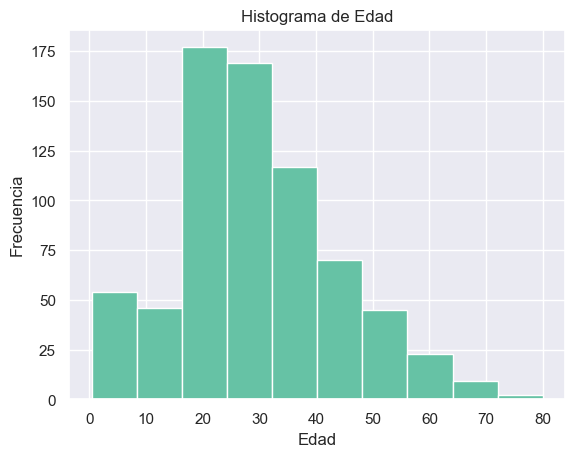

In [13]:
# histograma
df['Age'].plot(kind='hist')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

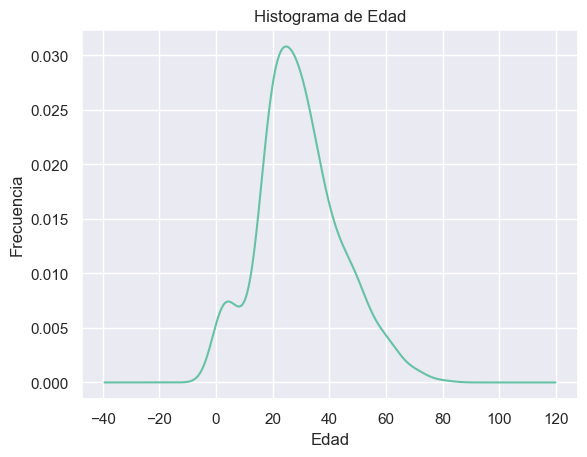

In [14]:
# density o kde
df['Age'].plot(kind='density')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

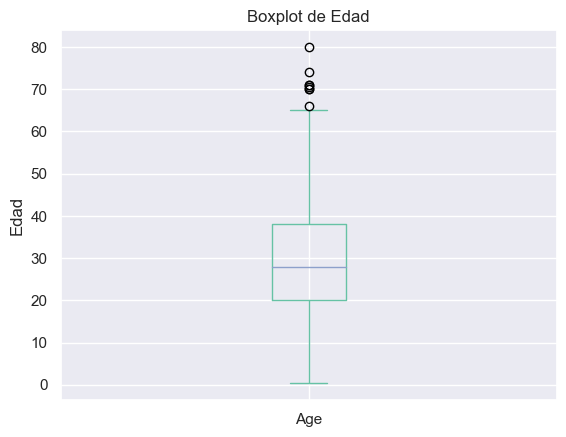

In [15]:
# boxplot
df.plot(kind='box', column='Age')

# establecer las etiquetas de los ejes y el título
plt.xlabel('')
plt.ylabel('Edad')
plt.title('Boxplot de Edad')
plt.show()

### Variables categóricas

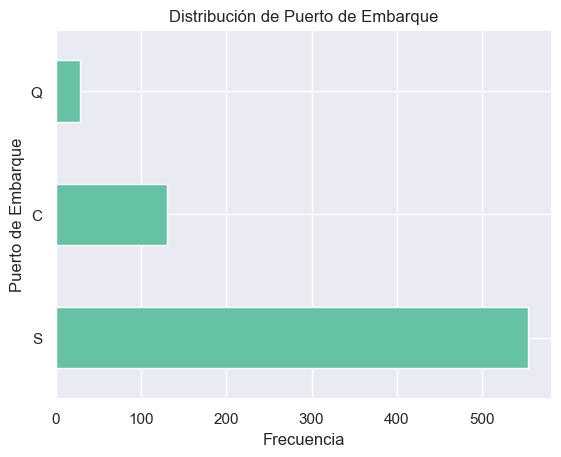

In [16]:
# barplot
df['Embarked'].value_counts().plot(kind='barh', rot=0)
plt.xlabel('Frecuencia')
plt.ylabel('Puerto de Embarque')
plt.title('Distribución de Puerto de Embarque')
plt.show()

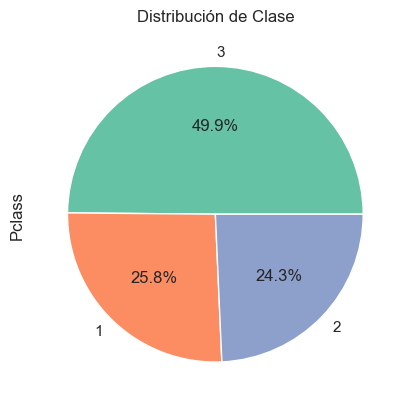

In [17]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Clase')
plt.show()

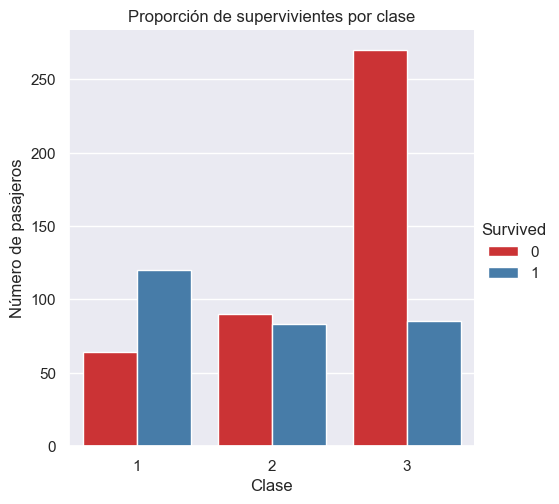

In [18]:
# Catplot: crear un gráfico de barras utilizando seaborn
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df, palette="Set1")

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Clase')
plt.ylabel('Número de pasajeros')
plt.title('Proporción de supervivientes por clase')

# Mostrar el gráfico
plt.show()

### Variables continuas vs categóricas

¿Que pasa si queremos visualizar la distribución de la variable continua pero según otra variable como puede ser el sexo? Es decir visualizar una distribución continua (`"Age"`) según una variable categórica (`"Sex"`). Para esto podemos usar de nuevo el histograma.

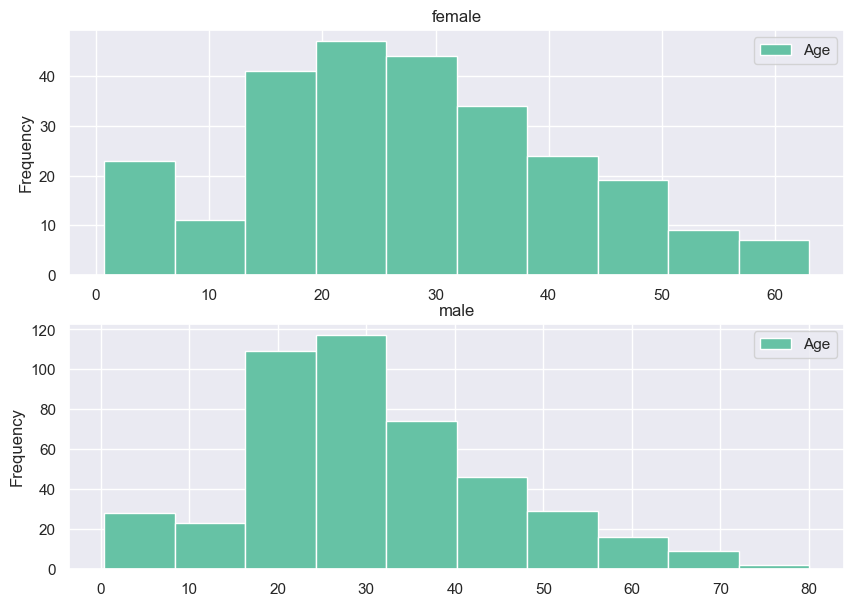

In [19]:
# distribución de "edad" según "sexo"
df.plot(kind='hist', column='Age', by='Sex', figsize=(10, 7))
plt.show()

Text(0.5, 1.0, 'Distribución de edades por clase')

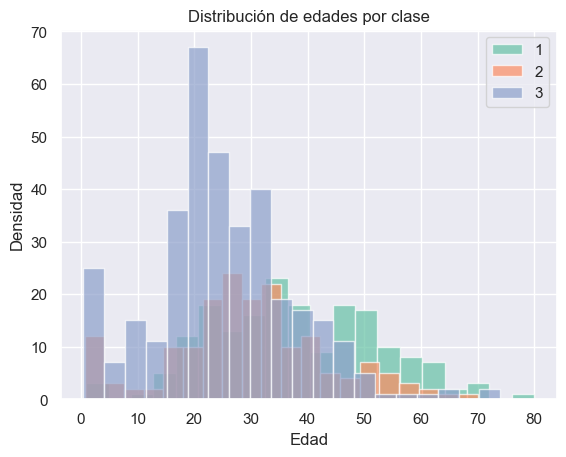

In [20]:
# distribución de edad segun la clase
ax = df.groupby('Pclass')['Age'].plot(kind='hist', bins=20, alpha=0.7, legend=True)

# definimos las etiquetas de los ejes y el título del gráfico
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de edades por clase')

Text(0.5, 1.0, 'Distribución de edades por estado de supervivencia')

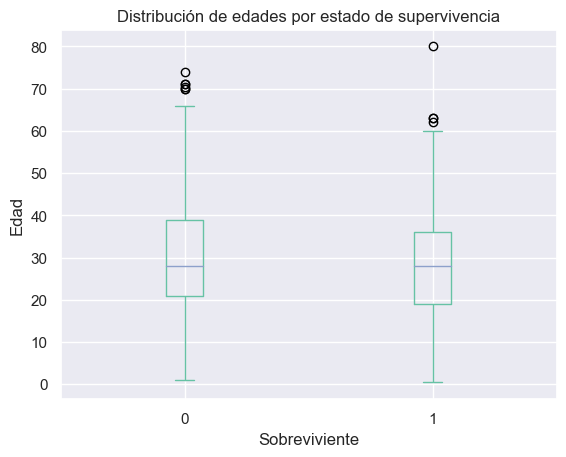

In [21]:
df[['Survived', 'Age']].plot(kind='box', by='Survived')

plt.xlabel('Sobreviviente')
plt.ylabel('Edad')
plt.title('Distribución de edades por estado de supervivencia')

Text(0.5, 1.0, 'Distribución de edades por estado de supervivencia')

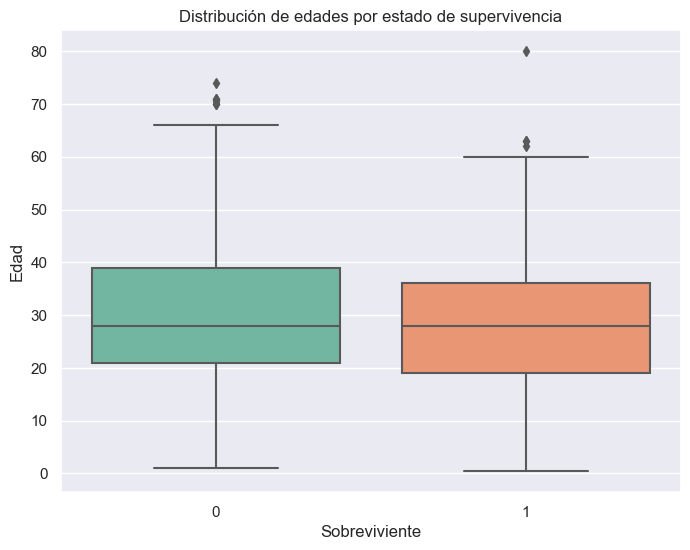

In [22]:
# lo mismo pero con seaborn, necesitamos cambiar el tamño de la figura
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Sobreviviente')
plt.ylabel('Edad')
plt.title('Distribución de edades por estado de supervivencia')

Text(0.5, 1.0, 'Distribución de tickets por estado de supervivencia')

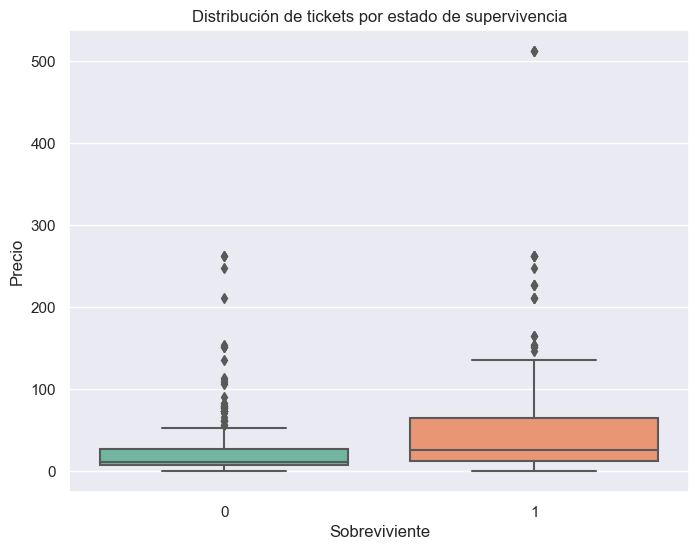

In [23]:

# lo mismo pero con seaborn, necesitamos cambiar el tamño de la figura
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Sobreviviente')
plt.ylabel('Precio')
plt.title('Distribución de tickets por estado de supervivencia')

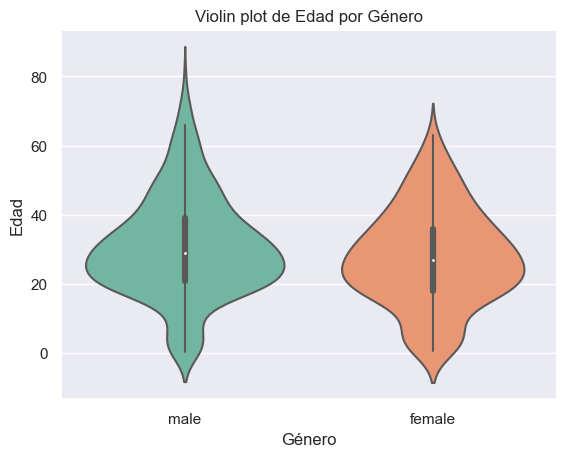

In [24]:
# hacer un violin plot de la edad por género
sns.violinplot(x='Sex', y='Age', data=df)

# establecer las etiquetas de los ejes y el título
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Violin plot de Edad por Género')
plt.show()

### Variables continuas vs continuas

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


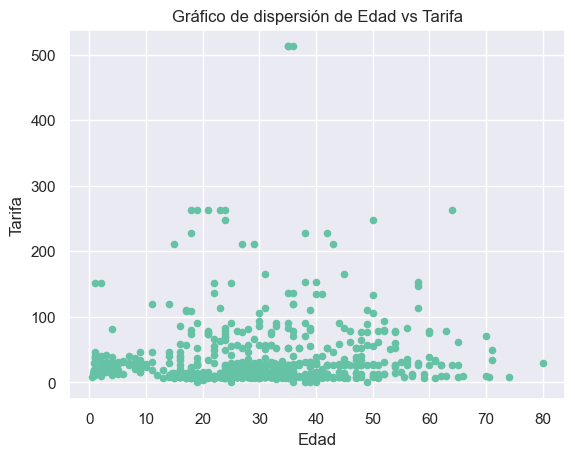

In [25]:
# scatterplot: distribución de edades según cuanto pagaron
df.plot(x='Age', y='Fare', kind='scatter')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

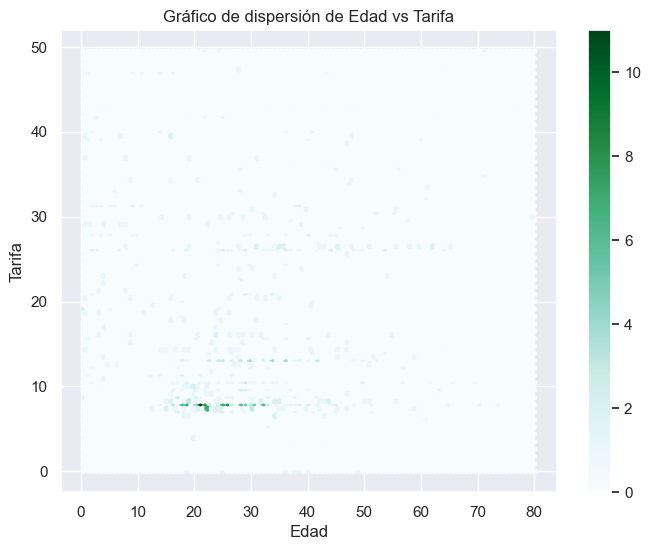

In [26]:
# hexbin
df[df['Fare']<50].plot(x='Age', y='Fare', kind='hexbin', figsize=(8, 6))
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

Le podemos agregar información categorica pintando por colores

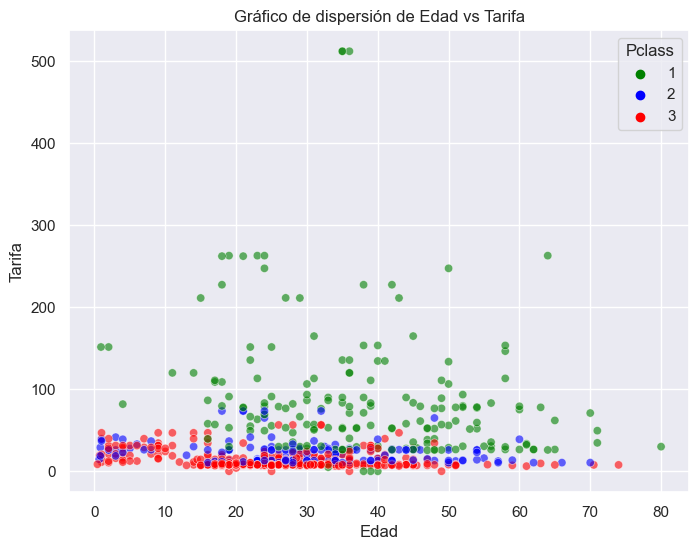

In [27]:
# definimos colores preestablecidos para cada clase de pasajero
colors = {1:'green', 2:'blue', 3:'red'}

# crear un gráfico de dispersión utilizando Seaborn y asignando colores según la clase de pasajero
plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette=colors, alpha=0.6)

# definimos las etiquetas de los ejes y el título del gráfico
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

### Variables categóricas vs categóricas

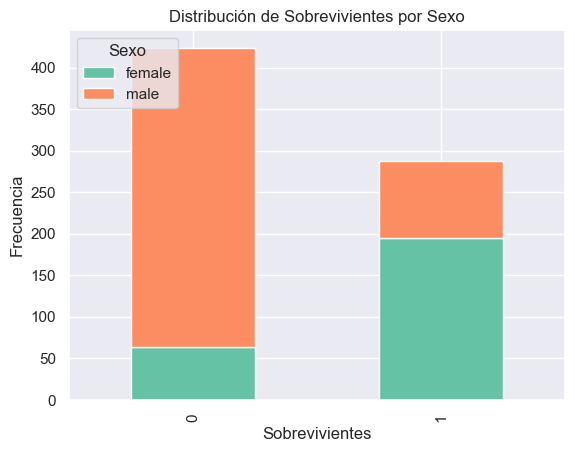

In [28]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar', stacked=True)
plt.xlabel('Sobrevivientes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sobrevivientes por Sexo')
plt.legend(title='Sexo', loc='upper left')
plt.show()

¿Qué otros gráficos se les ocurren que podemos hacer?

# Introduccion al aprendizaje inductivo (35 minutos)

Para esta parte vamos a ver de manera bastante artesanal cómo explorar un problema de clasificación simple y computar algunas medidas de performance. En un futuro, vamos a utilizar librerías específicas que van a facilitar la parte de código, pero para empezar a entender mejor algunos de los conceptos vistos en la teórica, está bueno que en esta práctica nos ensuciemos un poco las manos.

## Parte 1: Creación de datos
Vamos primero a crear una función auxiliar:

```def dataset_sintetico_gausianas(medias,covs,n_puntos,etiquetas)```

Si llamamos a esta funcion con: 
```
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [1,2]
medias = [c1_mean,c2_mean,c3_mean,c4_mean]
cov = [[0.4,0],[0,1.2]]
covs = [cov,cov,cov,cov]
n_puntos = [100,100,100,100]
etiquetas = ['A','B','B','A']
```

Esto significa que tengo cuatro gaussianas bivariadas con distintas medias, y dos corresponden a la clase 'A', y las otras a 'B'. De cada gaussiana muestreo 100 puntos.
La función debe devolver un dataframe con los 400 puntos como filas, cada dimensión como columna (en este caso 2 porque la gausiana es bivariada), y una columna extra con nombre 'Clase' que indique si el punto pertenece a 'A' o a 'B'.

 La función *zip()* toma como argumento dos o más objetos iterables (idealmente cada uno de ellos con la misma cantidad de elementos) y retorna un nuevo iterable cuyos elementos son tuplas que contienen un elemento de cada uno de los iteradores originales.

In [29]:
def dataset_sintetico_gausianas(means,covs,points,labels,seed=1234):
  all_dfs = []
  np.random.seed(seed)

  for mean_i,cov_i,points_i,label_i in zip(means,covs,points,labels):
    features_i = np.random.multivariate_normal(mean=mean_i, cov=cov_i,size=points_i)
    dataset_i = pd.DataFrame(features_i)
    dataset_i['Clase'] = label_i
    all_dfs.append(dataset_i)
  
  return pd.concat(all_dfs)


El código es una función llamada "dataset_sintetico_gausianas" que genera un conjunto de datos sintéticos con distribución normal (gausiana). Toma como entrada cuatro parámetros: "means" y "covs" son listas de matrices que representan las medias y covarianzas de cada distribución normal, respectivamente. "points" es una lista de enteros que representa el número de puntos a generar para cada distribución normal. "labels" es una lista de etiquetas para cada distribución normal.

La función comienza inicializando una lista vacía llamada "all_dfs", que se usará para almacenar todos los DataFrames generados. Luego, establece una semilla de aleatoriedad utilizando np.random.seed para garantizar que los resultados sean reproducibles.

A continuación, la función itera sobre los cuatro parámetros proporcionados usando la función zip, que combina los elementos correspondientes de las listas "means", "covs", "points" y "labels". En cada iteración, la función genera un conjunto de características aleatorias utilizando la función multivariate_normal de la biblioteca NumPy, que toma la media y la matriz de covarianza como parámetros y genera una muestra aleatoria de una distribución normal multivariante. El número de puntos generados se especifica utilizando el parámetro "points_i".

Los datos generados se almacenan en un DataFrame de Pandas llamado "dataset_i", al que se le agrega una columna adicional llamada "Clase" que representa la etiqueta correspondiente. El DataFrame se agrega a la lista "all_dfs" para su posterior concatenación.

Finalmente, la función devuelve el resultado de la concatenación de todos los DataFrames generados, lo que da como resultado un conjunto de datos sintéticos completo con todas las distribuciones normales y etiquetas especificadas.

In [30]:
arr = np.random.multivariate_normal(mean=[0,1,2], cov=[[0.4,0,0],[0,1.2,0],[0,0,2.0]],size=100)
arr

array([[ 3.52617004e-01,  2.48782826e-01,  3.30816050e+00],
       [ 7.23199085e-01,  5.94230901e-01,  1.49690595e-01],
       [-2.00373795e-01,  1.27299936e+00,  1.03538094e+00],
       [-5.17481534e-01,  9.57184887e-01,  3.62288997e+00],
       [ 6.02316558e-01, -2.93317666e-01,  4.21970159e+00],
       [ 1.75288221e-01,  5.72591943e-01,  2.31631543e+00],
       [ 2.92894753e-01,  1.02519182e+00, -5.82469635e-01],
       [-1.37377399e+00,  5.11121554e-01,  1.34600055e+00],
       [ 2.92057157e-01, -9.32587927e-02,  1.76542520e+00],
       [-7.42221084e-01,  8.25905932e-01,  1.09500668e+00],
       [ 3.18606558e-01,  2.19155491e+00, -1.35212499e+00],
       [-8.97207432e-01, -5.77440103e-01,  2.91828965e+00],
       [ 3.85833748e-01,  1.40130891e+00,  1.61759045e-01],
       [-1.03233648e+00, -7.66725343e-01,  2.53368533e+00],
       [-2.30854585e-01,  1.24377819e+00,  2.56700551e+00],
       [-1.61852700e-01,  4.78256127e-01,  2.01035293e+00],
       [ 4.92535107e-01,  1.94008773e+00

In [31]:
a = pd.DataFrame(arr)
a['Clase'] = 'A'

In [32]:
a

,0,1,2,Clase
0,0.352617,0.248783,3.308160,A
1,0.723199,0.594231,0.149691,A
2,-0.200374,1.272999,1.035381,A
3,-0.517482,0.957185,3.622890,A
4,0.602317,-0.293318,4.219702,A
...,...,...,...,...
95,-0.158969,0.727652,4.374985,A
96,-0.591971,0.678475,1.880195,A
97,0.399178,1.508805,-0.888119,A
98,0.505257,1.034949,0.100284,A


Realicemos un scatter plot de los datos creados con los parámetros de ejemplo:

,0,1,Clase
0,3.104559,-3.096203,A
1,0.634673,-3.029106,A
2,3.597409,0.978826,A
3,1.945130,-2.806810,A
4,4.791007,-3.962069,A
...,...,...,...
95,1.820976,8.969129,C
96,2.567385,7.574586,C
97,3.995252,10.575914,C
98,5.877095,9.862307,C


<AxesSubplot:xlabel='0', ylabel='1'>

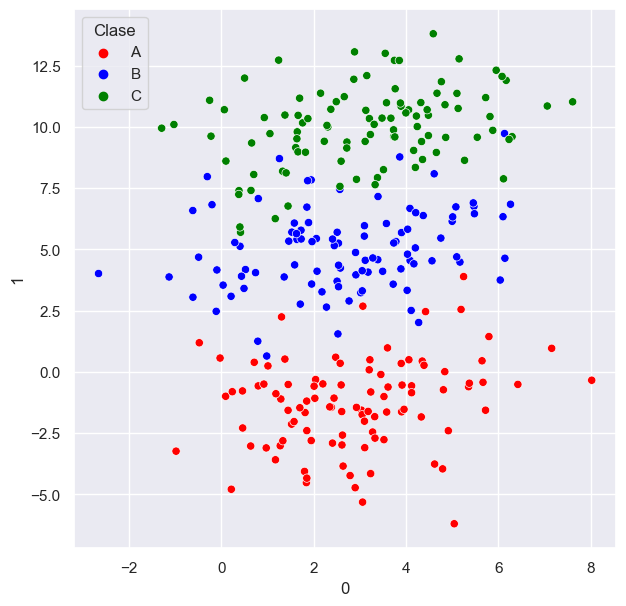

In [33]:
cov = [[4,1],[1,3]] # matriz de covarianza
                    #   x  y
                    # x [[4,1],  4 =  es la varianza de x; 3 = varianza de y
                    # y  [1,3]]  1 = covarianza(x;y)
c1_mean = [3,-1]
c2_mean = [3,5]
c3_mean = [3,10]
#c4_mean = [1,2]

dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean
                                      #,c4_mean
                                       ],[cov,cov, cov
                                         #,cov
                                         ],[100,100,100
                                        #,100
                                           ],['A','B', "C"
                                                #,'B','A'
                                                ])

display(dataset)

plt.figure(figsize=(7,7))
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue', 'C': 'green'})

In [34]:
print(cov)

[[4, 1], [1, 3]]


In [35]:
dataset.groupby("Clase").describe()

0                                                              \
       count      mean       std       min       25%       50%       75%   
Clase                                                                      
A      100.0  2.880970  1.709658 -0.981354  1.667887  2.911477  3.923225   
B      100.0  2.658650  1.847983 -2.660131  1.585103  2.551979  4.031299   
C      100.0  3.112518  1.894901 -1.293177  1.655069  3.267503  4.381205   

                     1                                                     \
            max  count      mean       std       min       25%        50%   
Clase                                                                       
A      8.019691  100.0 -1.335065  1.858663 -6.203065 -2.613826  -1.151359   
B      6.261278  100.0  5.014206  1.670478  0.646343  3.947599   4.968637   
C      7.606726  100.0  9.999605  1.609309  5.700116  9.115969  10.083620   

                             
             75%        max  
Clase                        
A      -0.335442   3.890030  
B       6.092215   9.731802  
C      10.991604  13.807267

## Parte 2: Definir un ajuste intuitivo


Vamos a tratar de encontrar una manera intuitiva de encontrar un punto de corte para separar los datos en dos clases.

Para ello vamos a aprender a hacer gráficos interactivos y utilizando sliders encontrar el mejor valor para separar los datos. Primero, importemos las bibliotecas que necesitaremos para crear nuestro gráfico interactivo.

In [35]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

Ahora, crearemos una función que dibujará el gráfico que queremos hacer donde tendremos una recta controlada un slider para ajustar su intersección en el eje y.

In [36]:
def plot_line(b):
    cov = [[0.4,0],[0,1.2]]
    c1_mean = [0,3]
    c2_mean = [3,0]
    c3_mean = [2,3]
    c4_mean = [1,2]
    dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[100,100,100,100],['A','B','B','A'])

    fig, ax = plt.subplots()
    sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})

    plt.axvline(x=b,c='k', lw=3)
    
    ax.set_xlim(-3, 5)
    ax.set_ylim(-4, 6)
    plt.show()

In [37]:
interact(plot_line, b=(-5.0, 5.0))


interactive(children=(FloatSlider(value=0.0, description='b', max=5.0, min=-5.0), Output()), _dom_classes=('wi…

<function __main__.plot_line(b)>

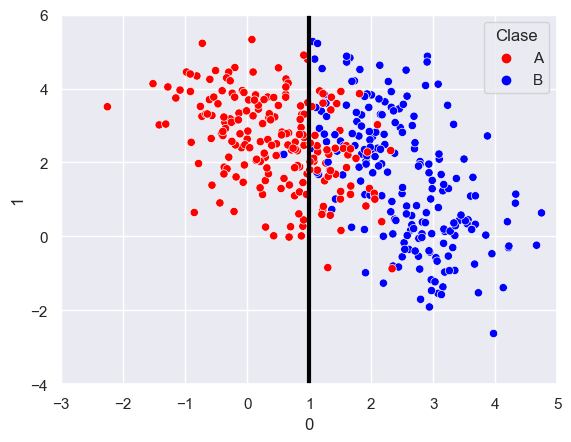

In [38]:
cov = [[0.4,0],[0,1.2]]
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [1,2]
dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[100,100,100,100],['A','B','B','A'])

fig, ax = plt.subplots()
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})

plt.axvline(x=1,c='k', lw=3)

ax.set_xlim(-3, 5)
ax.set_ylim(-4, 6)
plt.show()

Repasando un poco la teoría, lo que estamos haciendo es explorar un **espacio de hipótesis** (H) conformado por todas las rectas verticales, para quedarnos con una única **hipótesis** (h) o modelo que consideremos que separa mejor los datos, y por lo tanto aproxima mejor la **función objetivo** (f) a partir de los **datos** que tenemos.

Estamos "entrenando a mano" un modelo de **aprendizaje supervisado**, puntualmente de **clasificación**, porque tenemos los datos **anotados** con la asignación de **clase** (color) de cada punto. Cada punto es por lo tanto una **instancia** o muestra, y el modelo construído va a permitirnos **predecir** una clase de acuerdo a la posición en el eje x de cada punto, siendo dicha posición el **atributo** que estamos usando para realizar la predicción.

##Parte 3: Determinar que tan buena fue la selección

Procedamos a calcular cuál es el porcentaje de pureza de cada mitad según la recta que definimos.

In [39]:
dataset[0]

0    -0.753239
1    -0.197738
2     0.561091
3    -0.402573
4    -1.418399
        ...   
95    1.018709
96    1.011047
97   -0.601304
98    0.395573
99    0.318590
Name: 0, Length: 400, dtype: float64

In [40]:
valor=1
dataset_izq = dataset[dataset[0] <= valor]
display(dataset_izq.head(15))
dataset_der = dataset[dataset[0] > valor]
display(dataset_der.head(15))


,0,1,Clase
0,-0.753239,3.516431,A
1,-0.197738,4.569452,A
2,0.561091,2.210635,A
3,-0.402573,3.941632,A
4,-1.418399,3.017195,A
5,0.627362,4.259801,A
6,-1.278354,4.044314,A
7,0.001340,2.634037,A
8,0.182838,3.444152,A
9,-0.978349,4.447256,A


,0,1,Clase
19,1.512176,3.922008,A
37,1.269871,1.985339,A
66,1.197576,3.894023,A
68,1.220795,0.715706,A
74,1.496243,2.866653,A
0,2.607882,-0.350062,B
1,2.638580,0.171983,B
2,2.499419,1.158579,B
3,3.045460,-0.574700,B
4,3.498353,2.093132,B


In [41]:
display(dataset_izq["Clase"].value_counts())
display(dataset_der["Clase"].value_counts())

A    147
B      1
Name: Clase, dtype: int64

B    199
A     53
Name: Clase, dtype: int64

In [44]:
cant_izq=dataset_izq["Clase"].value_counts()['A']/dataset_izq["Clase"]
print("El lado izquierdo tiene una pureza de: ",cant_izq," %")

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [45]:
dataset_der["Clase"].value_counts()

B    199
A     53
Name: Clase, dtype: int64

In [46]:
cant_der=dataset_der["Clase"].value_counts()['B']/dataset_der["Clase"].count()
print("El lado derecho tiene una pureza de: ",cant_der," %")

El lado derecho tiene una pureza de:  0.7896825396825397  %


Hagamos un repaso:

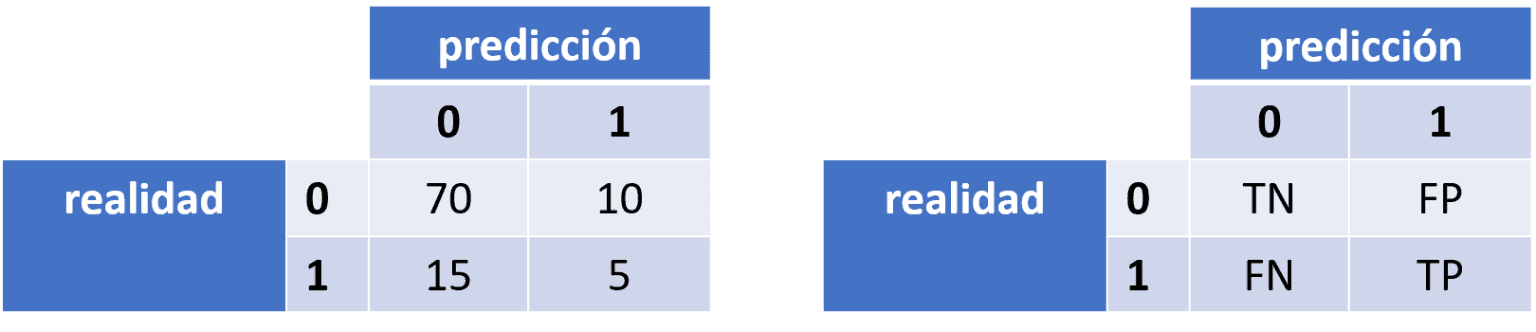

Precisión (Precision): mide la proporción de instancias positivas que fueron correctamente identificadas. Es decir, es la razón entre los verdaderos positivos y la suma de los verdaderos positivos y falsos positivos.

$Precision = \frac{TP}{TP + FP}$

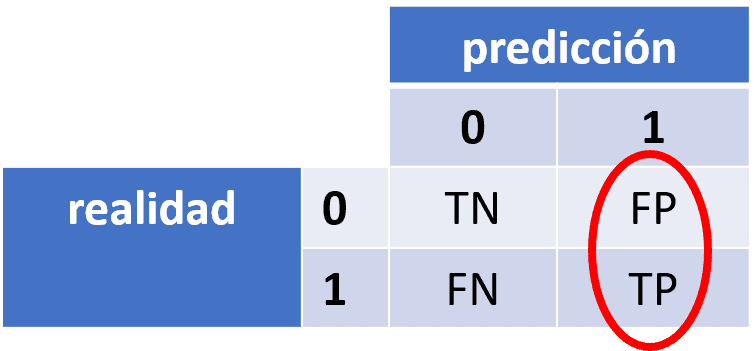

Recall (Sensibilidad o Tasa de Verdaderos Positivos): mide la proporción de instancias positivas que fueron correctamente identificadas en relación al total de instancias positivas. Es decir, es la razón entre los verdaderos positivos y la suma de los verdaderos positivos y falsos negativos.

$Recall = \frac{TP}{TP + FN}$

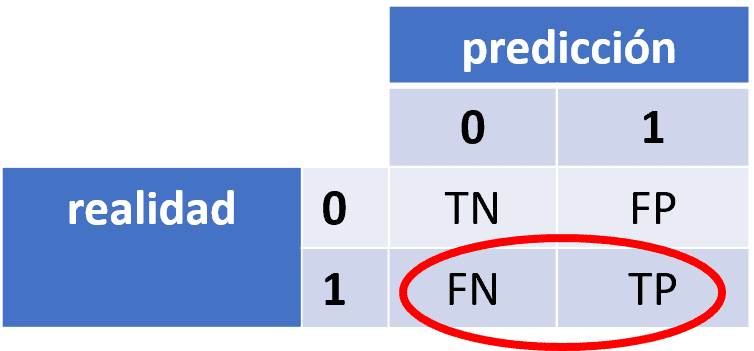

F1-Score: es una media armónica entre precision y recall. Es útil cuando se busca un equilibrio entre ambas métricas y se desea una medida que represente un buen desempeño global del modelo.

$F1\text{-}score = 2 * \frac{Precision * Recall}{Precision + Recall}$

Accuracy (Exactitud): mide la proporción de instancias totales que fueron correctamente clasificadas por el modelo. Es decir, es la razón entre los verdaderos positivos y verdaderos negativos y la suma de los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

$Accuracy = \frac{TP + TN}{TP + FP + TN + FN}$

Donde:

    TP (True Positives): instancias positivas que fueron clasificadas correctamente.
    TN (True Negatives): instancias negativas que fueron clasificadas correctamente.
    FP (False Positives): instancias negativas que fueron clasificadas incorrectamente como positivas.
    FN (False Negatives): instancias positivas que fueron clasificadas incorrectamente como negativas.

Lo que quede en el dataset de la izquierda lo clasificamos como A. De forma arbitraria vamos a tomar que la izquierda es positiva.

In [47]:
TP = len(dataset_izq[dataset_izq["Clase"]=="A"])
TN = len(dataset_der[dataset_der["Clase"]=="B"])
FP = len(dataset_izq[dataset_izq["Clase"]=="B"])
FN = len(dataset_der[dataset_der["Clase"]=="A"])

In [48]:
precision = TP / (TP + FP)
print("La precisión es ",precision)
recall = TP / (TP + FN)
print("La sensibilidad es ",recall)
F1 = 2*precision*recall/(precision+recall)
print("El F1 es ",F1)
accuracy=(TP+TN)/(TP+FP+TN+FN)
print("La exactitud es ",accuracy)

La precisión es  0.9932432432432432
La sensibilidad es  0.735
El F1 es  0.8448275862068965
La exactitud es  0.865


## Parte 4: Determinar el corte óptimo

Vamos muy bien! Ya tenemos una función que divide nuestros datos en grupos, y calculamos las diferentes métricas.

Ahora necesitamos que calculen el valor óptimo de b a partir de calcular las métricas para diferentes valores de b.

Elijan una metrica de las mencionadas anteriormente y completen segun lo indicado las siguientes celdas de codigo.

In [82]:
#Inserte su código en donde dice COMPLETAR
def predecir_clase(data, col):
    # esta funcion recibe "data", un dataframe donde seleccionaremos col, la columna que utilizaremos para cortar 
    # esta funcion devuelve un array con tantos valores como filas del dataframe, diciendo a que clase deberia pertenecer

    rango = np.arange(data[col].min(), data[col].max()-0.05, 0.05).round(2).tolist()

    data_procesada = pd.DataFrame(columns=["b",  "accuracy", "precision", "recall", "F1"])
    lista= []

    for b in  rango:

        dataset_izq = data[data[col] <= b]
        dataset_der = data[data[col] > b]

        TP = len(dataset_izq[dataset_izq["Clase"]=="A"])
        TN = len(dataset_der[dataset_der["Clase"]=="B"])
        FP = len(dataset_izq[dataset_izq["Clase"]=="B"])
        FN = len(dataset_der[dataset_der["Clase"]=="A"])

        accuracy, precision, recall, F1, fpr = calcular_metrica(TP, TN, FP, FN)
        #print(b , accuracy, precision, recall, F1)

        dic = {"b": b,
              "accuracy": accuracy,
              "precision":precision,
              "recall": recall,
              "F1": F1,
              }
        lista.append(dic)
        data_procesada = pd.DataFrame.from_dict(lista)



    return (data_procesada)

def calcular_metrica(TP, TN, FP, FN):

    # esta funcion toma dos vectores y calcula la metrica de su eleccion
    # pueden devolver un valor o mas
    # COMPLETAR
    precision = round(TP / (TP + FP),6)
    #print("La precisión es ",precision)
    recall = round(TP / (TP + FN),6)
    #print("La sensibilidad es ",recall)
    F1 = round(2*precision*recall/(precision+recall),6)
    #print("El F1 es ",F1)
    accuracy=round((TP+TN)/(TP+FP+TN+FN),6)
    fpr= round(FP/(TN+FP),6)

    return accuracy, precision, recall, F1, fpr






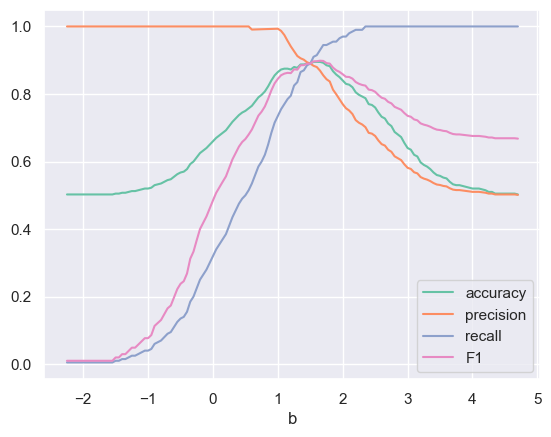

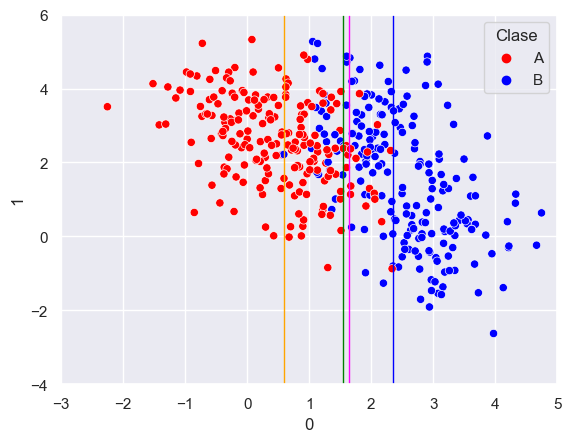

In [83]:
cov = [[0.4,0],[0,1.2]]
c1_mean = [0,3]
c2_mean = [3,0]
c3_mean = [2,3]
c4_mean = [1,2]
dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[100,100,100,100],['A','B','B','A'])


clase_predicha = predecir_clase(data = dataset, col = 0)
clase_predicha.plot(kind="line", x= "b")

fig, ax = plt.subplots()
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})

plt.axvline(x=clase_predicha.loc[clase_predicha.accuracy ==clase_predicha.accuracy.max(),"b"].reset_index()["b"][0],c='g', lw=1)

plt.axvline(x=clase_predicha.loc[clase_predicha.recall == clase_predicha.recall.max(),"b"].reset_index()["b"][0],c='b', lw=1)

plt.axvline(x=clase_predicha.loc[clase_predicha.precision < 0.99999999,"b"].reset_index()["b"][0],c='orange', lw=1)

plt.axvline(x=clase_predicha.loc[clase_predicha.F1 == clase_predicha.F1.max(),"b"].reset_index()["b"][0],c='magenta', lw=1)

ax.set_xlim(-3, 5)
ax.set_ylim(-4, 6)
plt.show()


 Parte 5: Generalización a una recta cualquiera

Ahora queremos en lugar de tener una recta vertical encontrar una recta con pendiente que pueda dividir entre los diferentes grupos.

In [51]:
def plot_general_line(m,b):
    cov = [[0.4,0],[0,1.2]]
    c1_mean = [0,3]
    c2_mean = [3,0]
    c3_mean = [2,3]
    c4_mean = [1,2]
    dataset = dataset_sintetico_gausianas([c1_mean,c2_mean,c3_mean,c4_mean],[cov,cov,cov,cov],[100,100,100,100],['A','B','B','A'])

    x = np.linspace(5,-5,1000)
    y = m*x + b

    fig, ax = plt.subplots()
    sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})

    sns.lineplot(x=x,y=y,lw=5)


    ax.set_xlim(-3, 5)
    ax.set_ylim(-4, 6)


In [52]:
interact(plot_general_line, m=(-20.0, 20.0), b=(-20.0, 20.0))


interactive(children=(FloatSlider(value=0.0, description='m', max=20.0, min=-20.0), FloatSlider(value=0.0, des…

<function __main__.plot_general_line(m, b)>

Ahora tienen que calcular las métricas para su selección y luego encontrar el óptimo.

In [94]:
#Inserte su código
#Creen una grilla de valores para probar para m y para b usen 1000 puntos entre 10 y -10 para m y entre -1 y 1 para b
#COMPLETAR

#Recorran esa grilla para distintos valores de m y b y calculen alguna de las metricas vistas, pueden reutilizar la recien implementada

def predecir_clase_pendiente(data):

    data_procesada = pd.DataFrame(columns=["m","b",  "accuracy", "precision", "recall", "F1", "fpr"])
    lista= []

    for m in  np.arange(-10,  10, 0.05).tolist():
        for b in np.arange(-1, 1, 0.2).tolist():

            try:

                if m >= 0:
                    dataset_izq = data[data[1] >= m*data[0] + b]
                    dataset_der = data[data[1] < m*data[0] + b]

                else:
                    dataset_izq = data[data[1] <= m*data[0] + b]
                    dataset_der = data[data[1] > m*data[0] + b]


                TP = len(dataset_izq[dataset_izq["Clase"]=="A"])
                TN = len(dataset_der[dataset_der["Clase"]=="B"])
                FP = len(dataset_izq[dataset_izq["Clase"]=="B"])
                FN = len(dataset_der[dataset_der["Clase"]=="A"])

                accuracy, precision, recall, F1, fpr = calcular_metrica(TP, TN, FP, FN)
                #print(b , accuracy, precision, recall, F1)

                dic = {"m":m,
                       "b": b,
                       "accuracy": accuracy,
                       "precision":precision,
                       "recall": recall,
                       "F1": F1,
                       "fpr": fpr
                       }
                lista.append(dic)

            except:
                pass

    data_procesada = pd.DataFrame.from_dict(lista)

    return data_procesada



#Elijan y grafiquen el mejor modelo encontrado
#COMPLETAR

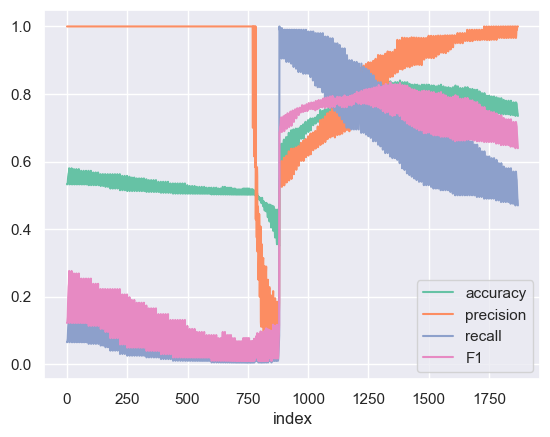

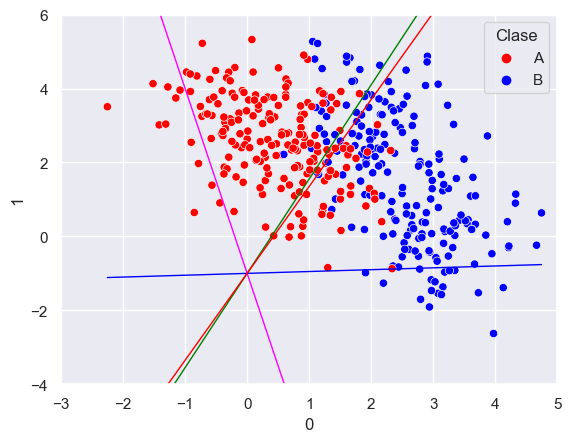

In [95]:
clase_predicha = predecir_clase_pendiente(data = dataset)
clase_predicha.reset_index()[["index","accuracy", "precision", "recall", "F1"]].plot(kind="line", x= "index")

fig, ax = plt.subplots()
sns.scatterplot(x=0,y=1,hue='Clase',data=dataset,palette={'A':'red','B':'blue'})
x = x = np.linspace(dataset[0].min(),dataset[0].max(),100)
m= clase_predicha.loc[clase_predicha.accuracy == clase_predicha.accuracy.max(),"m"].reset_index()["m"][0]
b= clase_predicha.loc[clase_predicha.accuracy == clase_predicha.accuracy.max(),"b"].reset_index()["b"][0]
plt.plot(x,  x * m + b ,c='g', lw=1)

m= clase_predicha.loc[clase_predicha.recall == clase_predicha.recall.max(),"m"].reset_index()["m"][0]
b= clase_predicha.loc[clase_predicha.recall == clase_predicha.recall.max(),"b"].reset_index()["b"][0]
plt.plot(x,  x * m + b ,c='b', lw=1)

m= clase_predicha.loc[clase_predicha.precision == clase_predicha.precision.max(),"m"].reset_index()["m"][0]
b= clase_predicha.loc[clase_predicha.precision == clase_predicha.precision.max(),"b"].reset_index()["b"][0]
plt.plot(x,  x * m + b ,c='magenta', lw=1)

m= clase_predicha.loc[clase_predicha.F1 == clase_predicha.F1.max(),"m"].reset_index()["m"][0]
b= clase_predicha.loc[clase_predicha.F1 == clase_predicha.F1.max(),"b"].reset_index()["b"][0]
plt.plot(x,  x * m + b ,c='red', lw=1)

ax.set_xlim(-3, 5)
ax.set_ylim(-4, 6)
plt.show()

In [106]:
roc= clase_predicha[["fpr"]].drop_duplicates().sort_values("fpr")

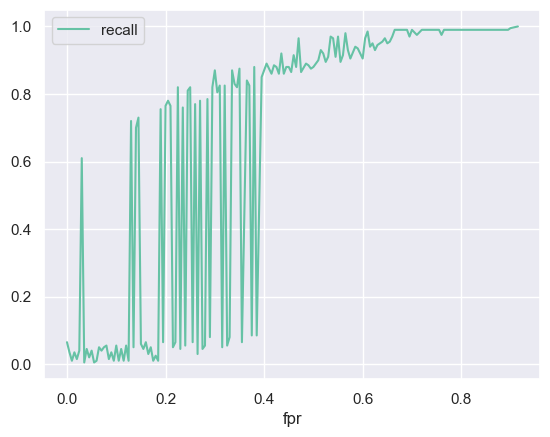

In [107]:
roc = roc.join(clase_predicha[["recall"]], how="left").plot(kind="line", x= "fpr")